### Gradient Descent

Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks.


Gradient descent is a way to minimize an objective function J(θ) parameterized by a model’s parameters θ by updating the parameters in the opposite direction of the gradient of the
objective function ∇θJ(θ) w.r.t. to the parameters. The learning rate η determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley.


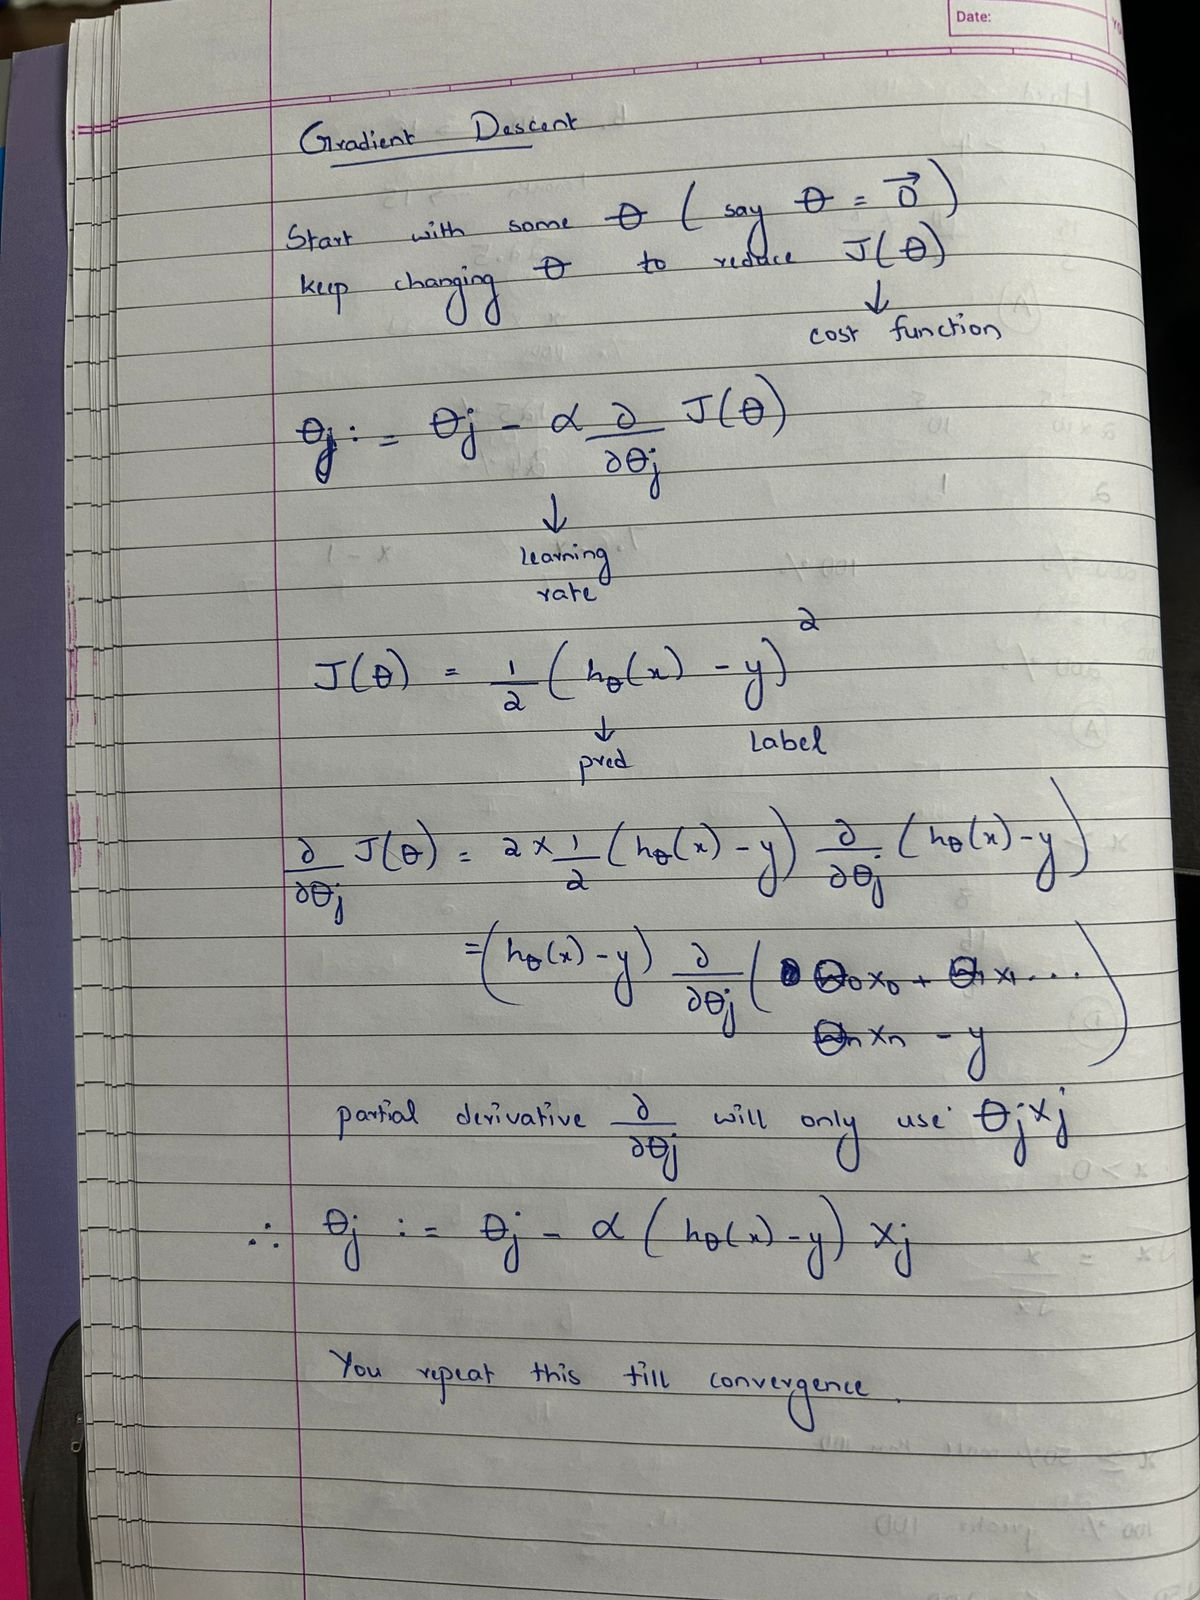

#### Three Variations of gradient descent

1. Batch Gradient Descent

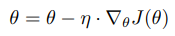

- This calculates the gradients and performs update for the entire dataset. 
- This can be extremely slow if the dataset is large.
- Batch gradient descent is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.


2. Stochastic Gradient Descent

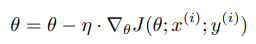

- This does it for every single example.
- Quite fast.
- But has a lot of noise, basically it takes one example and optimizes for it, then takes another one and goes lemme optimize for this, so its not a straight descent rather a zig zag one.
- Basically has high variance.
- Might not converge to global minima.
- However, it has been shown that when we slowly decrease the learning rate, SGD hows the same convergence behaviour as batch gradient descent, almost certainly converging to a
local or the global minimum for non-convex and convex optimization respectively.

3. Mini Batch Gradient Descent

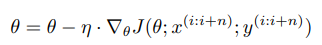

- take the best of both worlds but optimizing for small batch sizes.
- used in practice and pretty stable.



#### Local Optima in Neural Networks

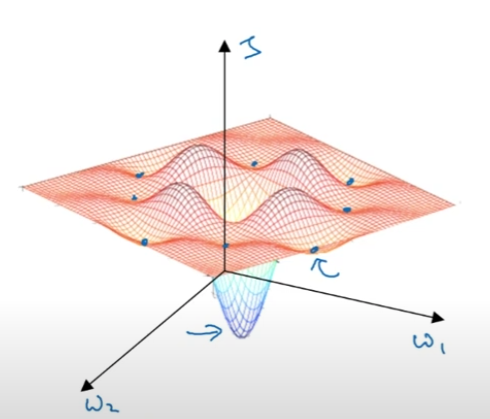

Many algorithms are believed to get stuck at locla minima(those blue points) at gradient 0 rather than global minima. But actually we get stuck at something called saddle points which are also zero gradient points.

Say we have 1000 features, to get stuck in local minima, each dimension should look like a convex or concave(the opposite) which is kinda pretty rare.

Instead we get stuck at this saddle point.

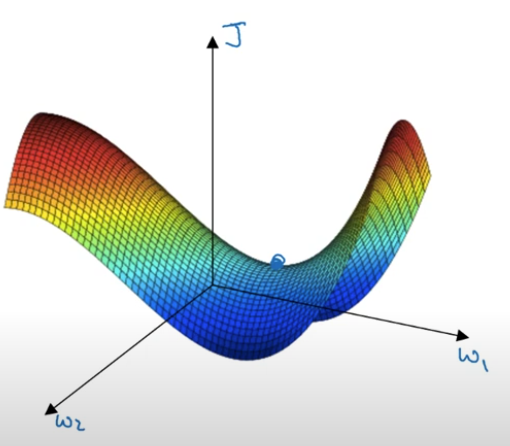


##### We have the problem of plateaus

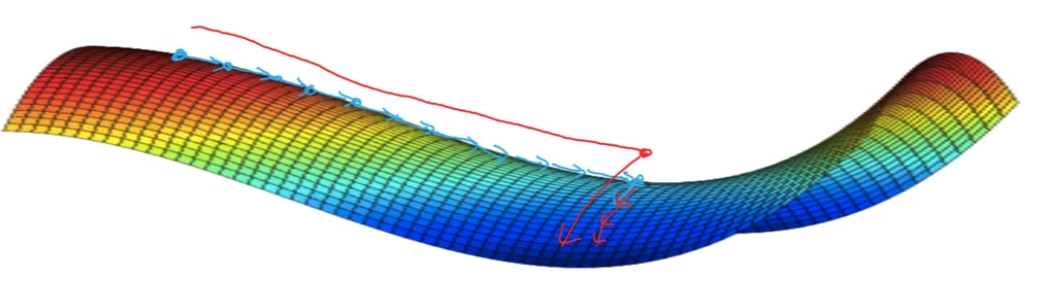

Plateaus have these curves where some curves are steeper and slows down learning quite a bit when using SGD.



#### Understanding convex and non-convex loss functions

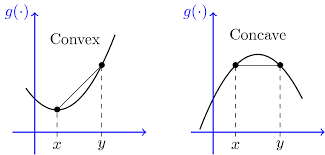

Convex functions 
1. they have only a single global minima and local minima.
2. We always find the optimal solution when we optimize convex functions.
3. bowl shaped figure
4. when you take a line segment between any two points on the graph of the function, it should lie above or on the graph of the function, and not below it.


Some examples

- L2 loss
- Log Loss
- L1 regularization
- L2 regularization

Non convex functions
1. they have multiple local minima.
2. hard to optimize as we can get stuck in local minima instead of global minima.

Some examples

- Binary or Categorical cross-entropy loss function
- Adversarial loss function in generative models


#### SGD often gets trapped in local minima in non convex functions

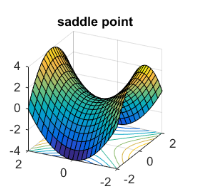


During stochastic gradient descent or mini batch, when you are descending this loss curve from a higher point, you are moving towards a single direction, and unless you are changing directions,  the gradient is comparatively flatter and you get stuck at saddle point.

When doing mini-batch, you consider many samples at a time and take the gradient step averaged over all of them. This reduces variance. But if the average gradient direction is still pointing in the same direction as the saddle point, then you still risk getting stuck there. The analogy is, if you're taking 2 steps forward and 1 step back, averaging over those, you ultimately end up taking 1 step forward. If you perform SGD instead, you take all the steps one after the other, but if you're still moving in a single direction, you can reach the saddle point and find that the gradient on all sides is fairly flat and the step size is too small to go over this flat part. This doesn't have anything to do with whether you considered a bunch of points at once, or one by one in random order.

Let's discuss methods that be able to break through local minima . But we need to understand couple concepts before that.


#### Exponentially weighted average


When you want to compute the rolling or the moving average of multiple data points, you can use -

```
Vt = β * Vt-1 + (1 - β) * θ
```

- Vt - rolling average
- β - how much importance you want to place
- Vt-1 - the previoud data point
- θ - the current data point

```
Vt ~ 1 / 1 - β data points
```

so 
- β = 0.9, then Vt is the average over 10 days
- β = 0.98, 50 days smoooooth curve
- β = 0.5, 2 days too much noise


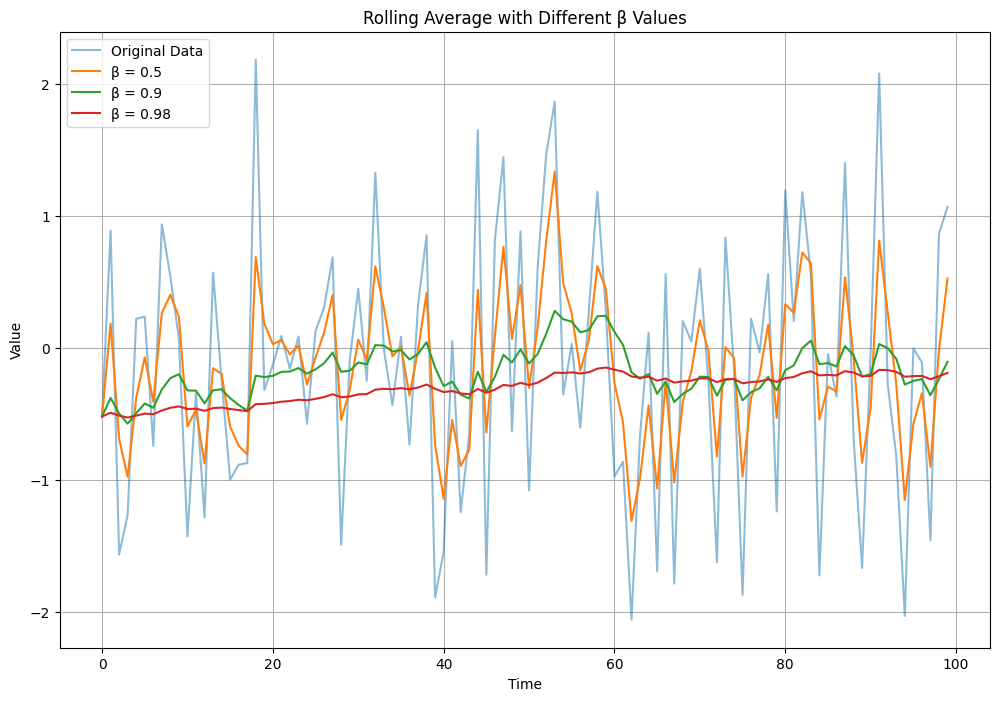

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_points):
    return np.random.randn(n_points)

def rolling_average(data, beta):
    v = np.zeros(len(data))
    v[0] = data[0]
    for i in range(1, len(data)):
        v[i] = beta * v[i-1] + (1 - beta) * data[i]
    return v

def plot_rolling_averages(data, betas):
    plt.figure(figsize=(12, 8))
    plt.plot(data, label='Original Data', alpha=0.5)
    
    for beta in betas:
        v = rolling_average(data, beta)
        plt.plot(v, label=f'β = {beta}')
    
    plt.title('Rolling Average with Different β Values')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate random data
n_points = 100
data = generate_data(n_points)

# Define β values
betas = [0.5, 0.9, 0.98]

# Plot the results
plot_rolling_averages(data, betas)